In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Input as 1d input
"""
z : next new measurement
x_est : estimate of previous measurement
P : std_dev of entire noisy signal so far
Q : Noise covariance
R : Covariance of Signal to be predicted
"""
def kalman_filter(z,x_est,dx,P,Q,R,dt = 1,first_time = 0):
    if first_time ==1:
        x0 = z
    #prediction step
    x_pred = x_est + dx*dt
    P = (1+dx**2)*P + Q
        
    # update step
    residual = z - x_pred
    Z = R + P
    K = P/Z
    P = (1-K)*P
    dx = dx + K*residual
    x_est = x_pred + K * residual   
    return x_est,P,dx
        

In [3]:
# Input as array of 1d inputs
"""
data : array of noisy input to be filtered
x0 : initial guess
Q : Noise covariance
R : Covariance of Signal to be predicted
"""
def kalman_filter_array(data, x0,dx,Q,R,dt):
    x_est = x0
    results = []
    P = 0
    k = 1
    for z in data:
        x_est,P,dx = kalman_filter(z,x_est,dx,P,Q,R,dt,first_time = k)
        k = 0
        results.append(x_est)
    return np.array(results)

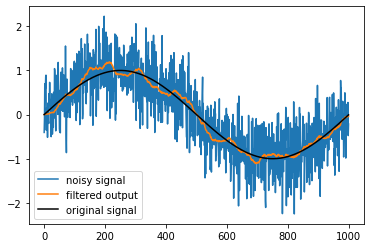

In [22]:
noise = np.random.normal(0,0.5,1000)
t = np.arange(1000)/1000
f = 1
sig = np.sin(2*np.pi*f*t)
noisy = sig + noise
a = kalman_filter_array(data = noisy,x0 = 0,dx = 0.001,Q = 0.5,R = 1000,dt = 0.1)
plt.plot(noisy,label='noisy signal')
plt.plot(a,label='filtered output')
plt.plot(sig,color = 'black',label = 'original signal')
plt.legend(loc = 'lower left')
plt.show()